In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os

In [5]:
groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
dir = "newexperiment1/finalgraphs"

MAE_matrix = np.zeros((8,8))
MAE_stdev = np.zeros((8,8))
CI_matrix = np.zeros((8,8))
CI_stdev = np.zeros((8,8))
CI_sizes = np.zeros((8,8))
CI_sizes_stdev = np.zeros((8,8))

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        file_dir = f"newexperiment1/trained{trained_on}/eval{eval_on}/aggregate/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        print(trained_on + eval_on + lines[1])
        
        MAE_info = lines[1]
        percent_CI_info = lines[3]
        
        x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
        MAE = float(x)
        
        stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
        stdev = float(stdev)
        
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        percent_in_CI = eval(lines[2])
        percent_in_CI = [i * 100 for i in percent_in_CI]
        avg = np.average(percent_in_CI)
        stdev = np.std(percent_in_CI)
        
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        sizes = eval(lines[4])
        avg = np.average(sizes)
        stdev = np.std(sizes)
        
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

print(MAE_matrix)

pass

SVCSVCMean absolute errors. avg:0.08935518749160422, stdev:0.08037876118275192

SVCTreesMean absolute errors. avg:0.08353465539196424, stdev:0.07763740268829977
SVCNBMean absolute errors. avg:0.09404317190122675, stdev:0.08995205965317618
SVCNeighborsMean absolute errors. avg:0.08785535650252084, stdev:0.08976757359570638

SVCLinearMean absolute errors. avg:0.0938329152701333, stdev:0.080000701585938
SVCDAMean absolute errors. avg:0.11004011899816812, stdev:0.11160853159190454

SVCnnMean absolute errors. avg:0.10034785680636515, stdev:0.10489918471530492

SVCDummyMean absolute errors. avg:0.09106875062123722, stdev:0.0775471320886397
TreesSVCMean absolute errors. avg:0.09635765743874937, stdev:0.1257022127420385
TreesTreesMean absolute errors. avg:0.06195288209803433, stdev:0.08440481568037689

TreesNBMean absolute errors. avg:0.10584297350835294, stdev:0.13897255402864309
TreesNeighborsMean absolute errors. avg:0.08961879460792764, stdev:0.12013185933341404

TreesLinearMean absolute e

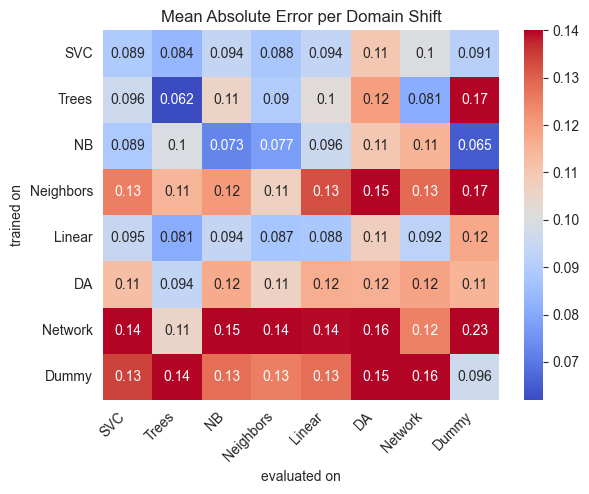

In [6]:
plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error per Domain Shift"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

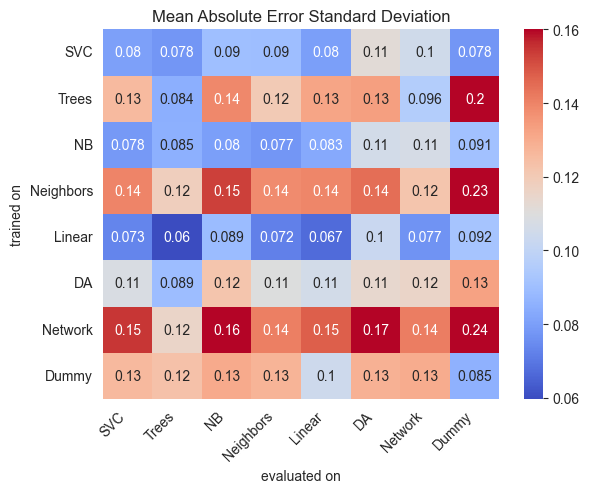

In [7]:
plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\1807750150.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


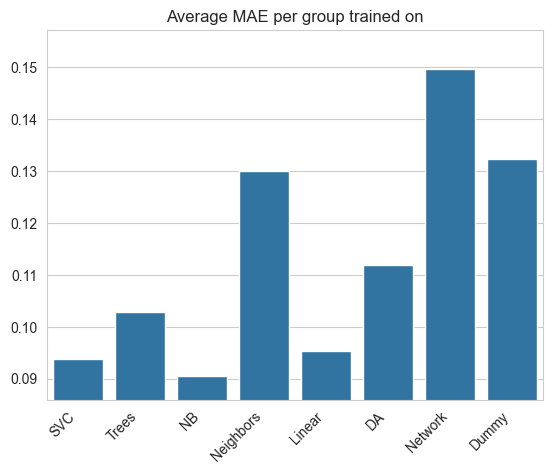

In [8]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\2552758926.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


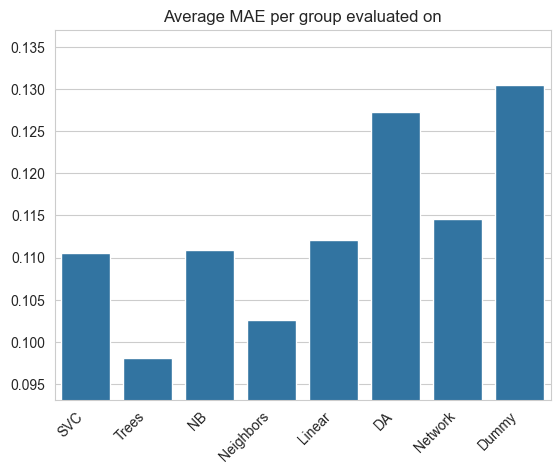

In [9]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group evaluated on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

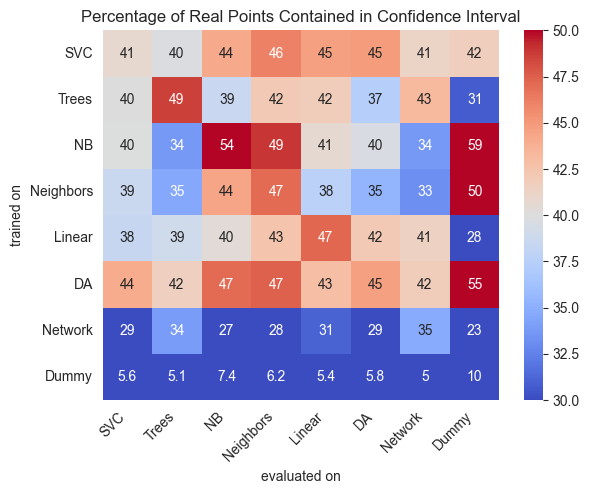

In [10]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=50,
            vmin=30,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Percentage of Real Points Contained in Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

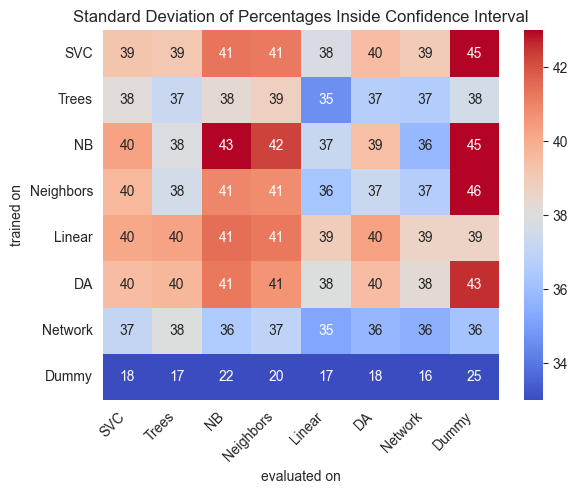

In [11]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Percentages Inside Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

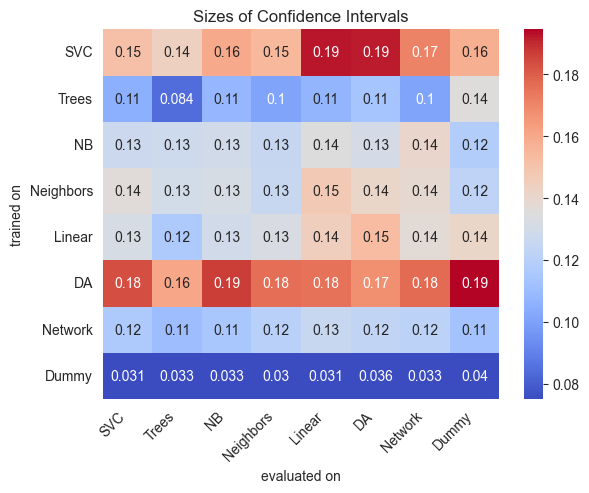

In [12]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

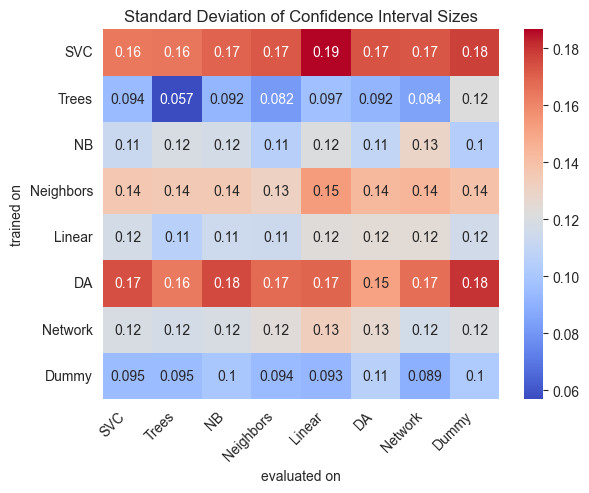

In [13]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Confidence Interval Sizes"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\540695433.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


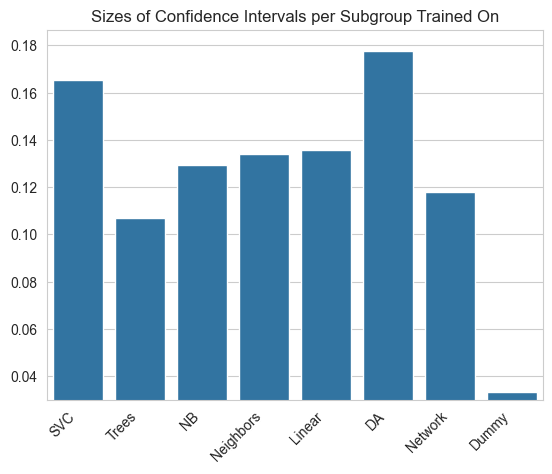

In [14]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals per Subgroup Trained On"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

[[ 0.         -0.00582053  0.00468798 -0.00149983  0.00447773  0.02068493
   0.01099267  0.00171356]
 [ 0.03440478  0.          0.04389009  0.02766591  0.04008951  0.05747673
   0.01908789  0.10472517]
 [ 0.01620064  0.02736983  0.          0.00491872  0.02309307  0.03731189
   0.04228832 -0.00783632]
 [ 0.0182354   0.00753095  0.01342215  0.          0.02598745  0.03917592
   0.02177178  0.05857353]
 [ 0.00656365 -0.00749389  0.00591    -0.00094004  0.          0.01919689
   0.00412462  0.02944067]
 [-0.0033991  -0.02185398  0.00145542 -0.00918108  0.00074598  0.
   0.00279638 -0.00079804]
 [ 0.01847469 -0.01951402  0.02956159  0.01482425  0.01466556  0.03770728
   0.          0.10212773]
 [ 0.03806666  0.04812454  0.03177411  0.02907133  0.03157773  0.05024142
   0.05927631  0.        ]]


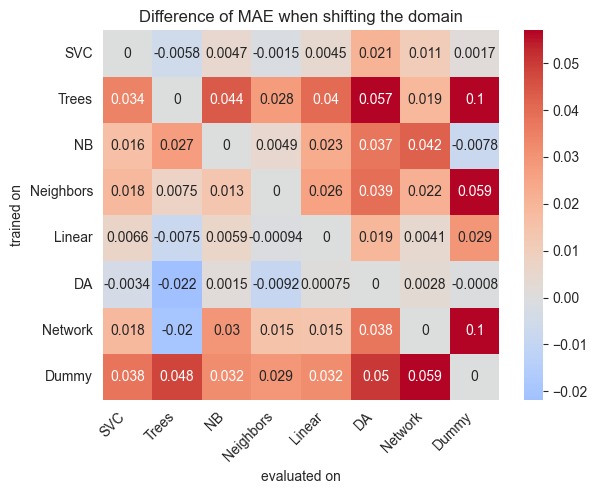

In [20]:
diff_matrix = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        diff_matrix[i][j] = MAE_matrix[i][j] - MAE_matrix[i][i]
print(diff_matrix)
# labels = labels[0:7]
plot = sns.heatmap(diff_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.057,
            center=0.0,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Difference of MAE when shifting the domain"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['SVC', 'Trees', 'NB', 'Neighbors', 'Linear', 'DA', 'Network', 'Dummy']


C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\3739192600.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


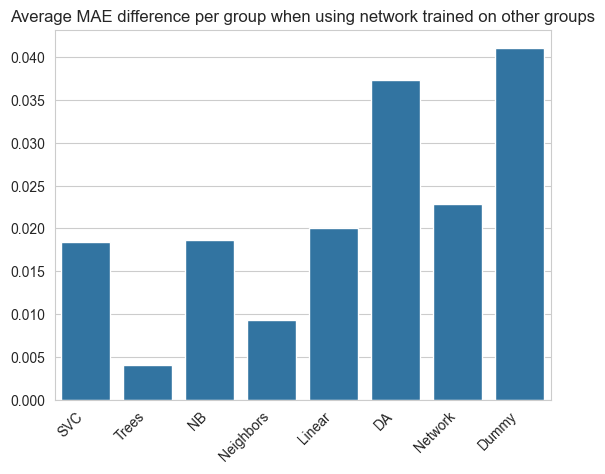

In [16]:
error_per_evaluated = np.sum(diff_matrix, axis=0)/7
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\341652508.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


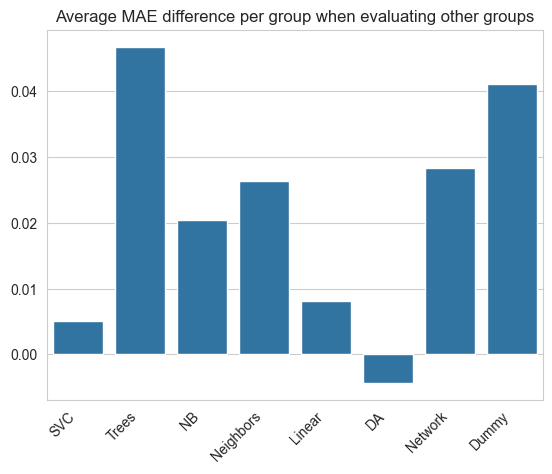

In [17]:
error_per_trained = np.sum(diff_matrix, axis=1)/7
plot = sns.barplot(x=labels, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['SVC', 'Trees', 'NB', 'Neighbors', 'Linear', 'DA', 'Network', 'Dummy']


C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\1100610148.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


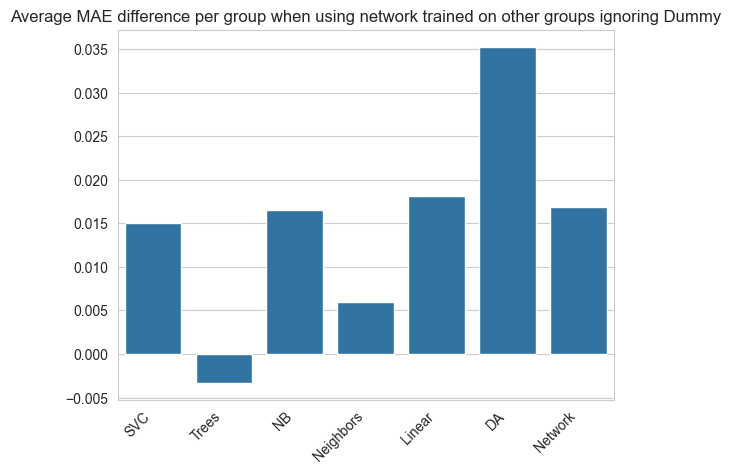

In [18]:
diff_without_dummy = diff_matrix[0:7, 0:7]
labels_without_dummy = labels[0:7]
error_per_evaluated = np.sum(diff_without_dummy, axis=0)/6
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels_without_dummy, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups ignoring Dummy"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_18840\3858231211.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


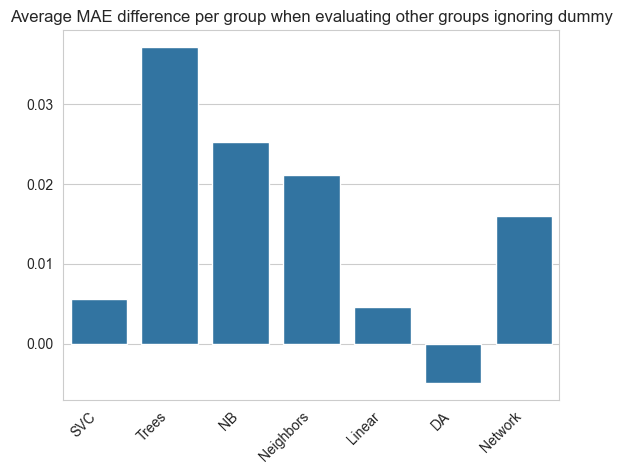

In [19]:
error_per_trained = np.sum(diff_without_dummy, axis=1)/6
plot = sns.barplot(x=labels_without_dummy, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups ignoring dummy"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()